:::{.callout-note}
Last update: 3 Jan 2024  
This page is a test post. The Jupyter notebook is a rough draft. This post is for testing only. Grammar and spelling checks have not been done.  
:::

## Abstract {.unnumbered}
This notebook analyzes a band pass [state variable filter](https://en.wikipedia.org/wiki/State_variable_filter). The filter has a natural frequency of 1000Hz and a Q of 40. 

## Introduction
This [JupyterLab notebook](https://jupyterlab.readthedocs.io/en/latest/) uses the [SymPy](https://www.sympy.org/), [NumPy](https://numpy.org/) and the [Python](https://www.python.org/) programming language libraries to analyze a band pass state variable filter from [1], Figure 7-15, page 182. The schematic for this filter is shown below.

![](state_variable_filter_1kHz_Q40.png)

The net list for the filter is:
```
* state_variable_filter_1kHz_Q40.asc
R3 3 1 1592
R6 6 4 1592
R7 8 7 1592
R5 4 3 1592
R2 7 5 191e3
C1 7 6 0.1e-6
C2 2 8 0.1e-6
O1 3 5 4
O2 6 0 7
V1 1 0 1
O3 8 0 2
R1 5 0 1592
R4 2 3 1592
```
The following network equations were generated with the MNA code:

$I_{V1} + \frac{v_{1}}{R_{3}} - \frac{v_{3}}{R_{3}} = 0$  
$- C_{2} s v_{8} + I_{O3} + v_{2} \left(C_{2} s + \frac{1}{R_{4}}\right) - \frac{v_{3}}{R_{4}} = 0$  
$v_{3} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{4}}{R_{5}} - \frac{v_{2}}{R_{4}} - \frac{v_{1}}{R_{3}} = 0$  
$I_{O1} + v_{4} \cdot \left(\frac{1}{R_{6}} + \frac{1}{R_{5}}\right) - \frac{v_{6}}{R_{6}} - \frac{v_{3}}{R_{5}} = 0$  
$v_{5} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{7}}{R_{2}} = 0$  
$- C_{1} s v_{7} + v_{6} \left(C_{1} s + \frac{1}{R_{6}}\right) - \frac{v_{4}}{R_{6}} = 0$  
$- C_{1} s v_{6} + I_{O2} + v_{7} \left(C_{1} s + \frac{1}{R_{7}} + \frac{1}{R_{2}}\right) - \frac{v_{8}}{R_{7}} - \frac{v_{5}}{R_{2}} = 0$  
$- C_{2} s v_{2} + v_{8} \left(C_{2} s + \frac{1}{R_{7}}\right) - \frac{v_{7}}{R_{7}} = 0$  
$v_{1} = V_{1}$  
$v_{3} - v_{5} = 0$  
$v_{6} = 0$  
$v_{8} = 0$  

Reference:  

1. Frank P. Tedeschi, The Active Filter Handbook, Tab Books, 1979
2. Tow, J. "Active RC Filters–A State-Space Realization”, Proc. IEEE, 1968, Vol.56, pp. 1137-1139.


In [1]:
import os
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

Copy the text strings generated by the Symbolic Modified Nodal Analysis Jupyter notebook to the cell below.

In [2]:
v3, C1, R4, I_O1, R3, I_O2, I_V1, R2, v4, R6, R5, v5, V1, v2, v1, v6, s, v7, I_O3, C2, v8, R1, R7 = symbols(' v3  C1  R4  I_O1  R3  I_O2  I_V1  R2  v4  R6  R5  v5  V1  v2  v1  v6  s  v7  I_O3  C2  v8  R1  R7 ')
A = Matrix([[1/R3, 0, -1/R3, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, C2*s + 1/R4, -1/R4, 0, 0, 0, 0, -C2*s, 0, 0, 0, 1], [-1/R3, -1/R4, 1/R5 + 1/R4 + 1/R3, -1/R5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1/R5, 1/R6 + 1/R5, 0, -1/R6, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1/R2 + 1/R1, 0, -1/R2, 0, 0, 0, 0, 0], [0, 0, 0, -1/R6, 0, C1*s + 1/R6, -C1*s, 0, 0, 0, 0, 0], [0, 0, 0, 0, -1/R2, -C1*s, C1*s + 1/R7 + 1/R2, -1/R7, 0, 0, 1, 0], [0, -C2*s, 0, 0, 0, 0, -1/R7, C2*s + 1/R7, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])
X = Matrix( [v1, v2, v3, v4, v5, v6, v7, v8, I_V1, I_O1, I_O2, I_O3] )
Z = Matrix( [0, 0, 0, 0, 0, 0, 0, 0, V1, 0, 0, 0] )

equ = Eq(A*X,Z)
equ

⎡                       v₁   v₃                 ⎤       
⎢                I_V1 + ── - ──                 ⎥       
⎢                       R₃   R₃                 ⎥       
⎢                                               ⎥       
⎢                          ⎛       1 ⎞   v₃     ⎥       
⎢     -C₂⋅s⋅v₈ + I_O3 + v₂⋅⎜C₂⋅s + ──⎟ - ──     ⎥       
⎢                          ⎝       R₄⎠   R₄     ⎥       
⎢                                               ⎥       
⎢          ⎛1    1    1 ⎞   v₄   v₂   v₁        ⎥   ⎡0 ⎤
⎢       v₃⋅⎜── + ── + ──⎟ - ── - ── - ──        ⎥   ⎢  ⎥
⎢          ⎝R₅   R₄   R₃⎠   R₅   R₄   R₃        ⎥   ⎢0 ⎥
⎢                                               ⎥   ⎢  ⎥
⎢                   ⎛1    1 ⎞   v₆   v₃         ⎥   ⎢0 ⎥
⎢         I_O1 + v₄⋅⎜── + ──⎟ - ── - ──         ⎥   ⎢  ⎥
⎢                   ⎝R₆   R₅⎠   R₆   R₅         ⎥   ⎢0 ⎥
⎢                                               ⎥   ⎢  ⎥
⎢                  ⎛1    1 ⎞   v₇               ⎥   ⎢0 ⎥
⎢               v₅⋅⎜── + ──⎟ - 

Takes about 50 seconds to solve

In [3]:
U_sym = solve(equ,X)

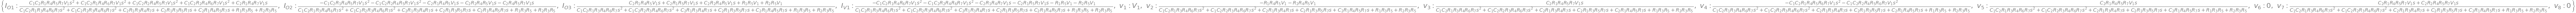

In [4]:
U_sym

BP

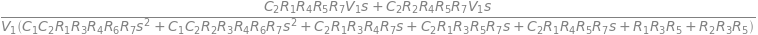

In [5]:
U_sym[v7]/V1

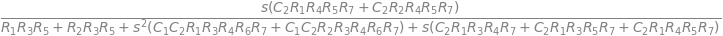

In [6]:
H_sym_bp = cancel(U_sym[v7]/V1,s)
H_sym_bp

In [7]:
sym_num, sym_denom = fraction(H_sym_bp,s) #returns numerator and denominator

In [8]:
sym_num

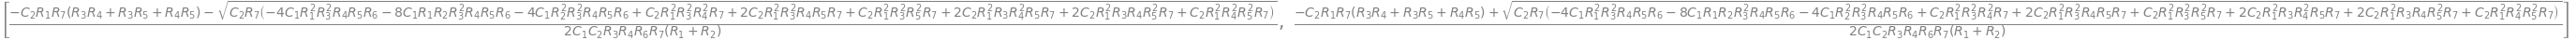

In [9]:
solve(sym_denom,s)

## Filter design
extract the traditional parameters: Q, wn $\omega _o$, $\zeta$ damping ratio

For the LP 

$s^{2}+s \frac {b}{a}+\frac {c}{a}=0$

$\frac {\omega _o}{Q} = \frac {b}{a}$

$\omega _o^2 = \frac {c}{a}$

$ \zeta = \frac {1}{2Q}$ 

Also

$s^{2}+2\zeta\omega _ns + \omega_n^2=0$

See Handbook of Op Amp circuit design, p10-3 for location of poles by filter type. Also see page 12-7 for state variable design of HP filter


A unity-gain Sallen–Key lowpass filter topology with equal capacitors and equal resistors is critically damped (i.e., $Q=\frac{1}{2}$).  
A second-order Bessel filter (i.e., continuous-time filter with flattest group delay) has an underdamped $Q=\frac{1}{\sqrt{3}}$.  
A second-order Butterworth filter (i.e., continuous-time filter with the flattest passband frequency response) has an underdamped $Q=\frac{1}{\sqrt{2}}$.  


[Quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation)


$ax^{2}+bx+c=0$


$x=\frac{-b\pm \sqrt {b^2-4ac}}{2a}$

What are the formulas for bode, chev and others?  Can Scipy get these roots?




In [10]:
str(sym_denom)

'R1*R3*R5 + R2*R3*R5 + s**2*(C1*C2*R1*R3*R4*R6*R7 + C1*C2*R2*R3*R4*R6*R7) + s*(C2*R1*R3*R4*R7 + C2*R1*R3*R5*R7 + C2*R1*R4*R5*R7)'

In [11]:
a = C1*C2*R1*R3*R4*R6*R7 + C1*C2*R2*R3*R4*R6*R7
b = C2*R1*R3*R4*R7 + C2*R1*R3*R5*R7 + C2*R1*R4*R5*R7
c = R1*R3*R5 + R2*R3*R5

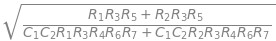

In [12]:
w_n = sqrt(c/a)
w_n

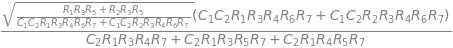

In [13]:
Q = (a/b)*w_n
Q

The element values are put into the Python dictionary format so that numerical values can be substituted into the equations.

In [14]:
nominal_component_value = {
    V1:1.0000e+00,
    R3:1.5920e+03,
    R6:1.5920e+03,
    R7:1.5920e+03,
    R5:1.5920e+03,
    R2:1.9100e+05,
    C1:1.0000e-07,
    C2:1.0000e-07,
    R1:1.5920e+03,
    R4:1.5920e+03}

In [15]:
Q.subs(nominal_component_value)

In [16]:
w_n.subs(nominal_component_value)/(2*np.pi)

The symbolic solutions obtained above will be used later when the sensitivity analysis of the preamp is performed.  Otherwise the roots in symbolic form don't seem to be particulary insightful, but are easily obtained by SymPy.

#### Numerical solution

In [17]:
# put the element values into the equations
equ1 = equ.subs(nominal_component_value)

Now we can diplay the network equations with values for the components instear of symbols.

In [18]:
equ1

⎡                          I_V1 + 0.000628140703517588⋅v₁ - 0.0006281407035175
⎢                                                                             
⎢            I_O3 - 1.0e-7⋅s⋅v₈ + v₂⋅(1.0e-7⋅s + 0.000628140703517588) - 0.000
⎢                                                                             
⎢   -0.000628140703517588⋅v₁ - 0.000628140703517588⋅v₂ + 0.00188442211055276⋅v
⎢                                                                             
⎢             I_O1 - 0.000628140703517588⋅v₃ + 0.00125628140703518⋅v₄ - 0.0006
⎢                                                                             
⎢                              0.000633376305611829⋅v₅ - 5.23560209424084e-6⋅v
⎢                                                                             
⎢               -1.0e-7⋅s⋅v₇ - 0.000628140703517588⋅v₄ + v₆⋅(1.0e-7⋅s + 0.0006
⎢                                                                             
⎢I_O2 - 1.0e-7⋅s⋅v₆ - 5.23560209424084e-6⋅v₅ + v₇⋅(1

Using the SymPy solve function we can solve the system of equations.

In [19]:
U = solve(equ1,X)

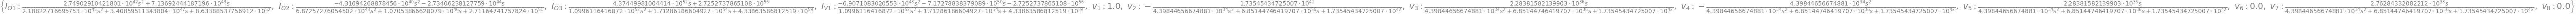

In [20]:
U

Band pass transfer function

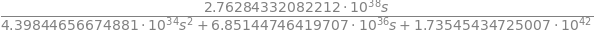

In [21]:
H_bp = U[v7]/U[v1]
H_bp

factor() takes a polynomial and factors it into irreducible factors over the rational numbers. For example:

In [22]:
H_bp.factor()

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [23]:
H_bp_num, H_bp_denom = fraction(H_bp) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [24]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_bp_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_bp_denom, s).all_coeffs(), dtype=float)
bp_sys = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easly be obtained with the following code:

In [25]:
bp_sys_zeros = np.roots(bp_sys.num)
bp_sys_poles = np.roots(bp_sys.den)

### Pole zero plot
The poles and zeros of the preamp transfer function are plotted.

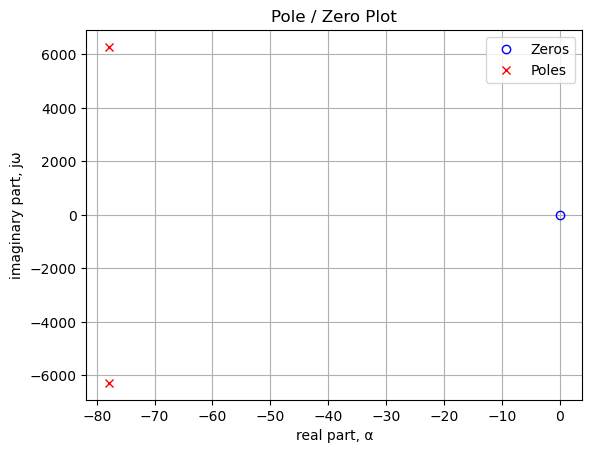

In [26]:
plt.plot(np.real(bp_sys_zeros), np.imag(bp_sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(bp_sys_poles), np.imag(bp_sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [27]:
print('number of zeros: {:d}'.format(len(bp_sys_zeros)))
for i in bp_sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [28]:
print('number of poles: {:d}'.format(len(bp_sys_poles)))
for i in bp_sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 2
-12.40+999.64j Hz
-12.40-999.64j Hz


We can see that the RIAA time constants, displayed in terms of frequency are present, althought the values diffeer by a few Hz. There are two zeros and two poles at nearly zero hz and these cancel each other. 

### Stability
By inspecting the plot above, we can tell the preamplifier is stable since the phase shift at 0 dB of gain is less than 180 degrees. Additionally, all the poles of the transfer function are in the left hand plane.

Now we can find the preamp gain at 1 kHz, so that the bode plots can be normailized.

### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

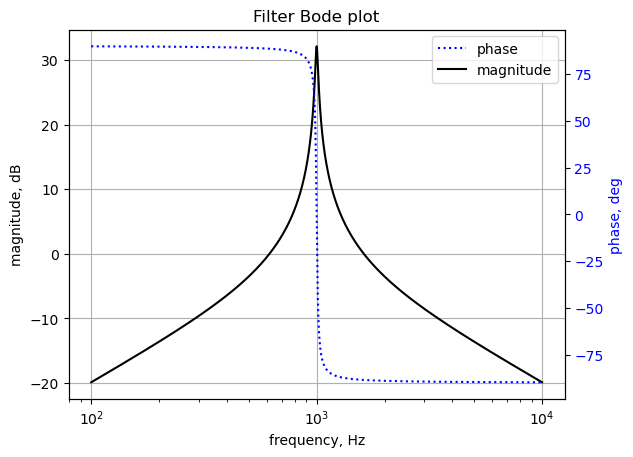

In [29]:
x_axis_range = np.logspace(2, 4, 5000, endpoint=True)*2*np.pi
w, mag, phase = bp_sys.bode(w=x_axis_range)

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'b' #'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color=color,label='phase')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(np.NaN, np.NaN, '-', color='k', label='magnitude')

plt.legend(loc=0)
plt.title('Filter Bode plot')
plt.show()

The Bode plot for the preamplifier is plotted from 0.01 Hz to 100 MHz. The preamplifier circuit blocks DC because C4 in in series with the audio path. 

### Impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

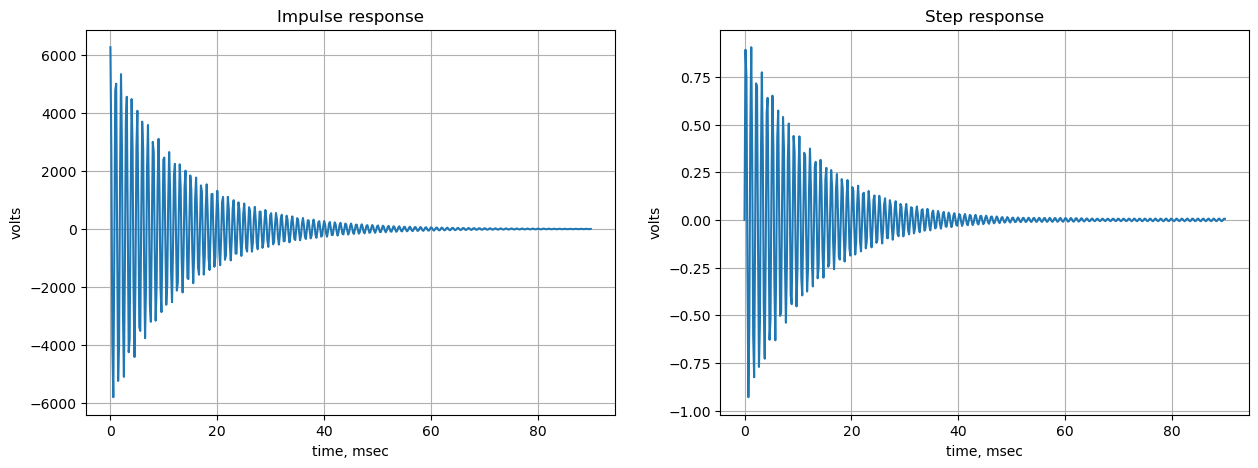

In [30]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(bp_sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(bp_sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

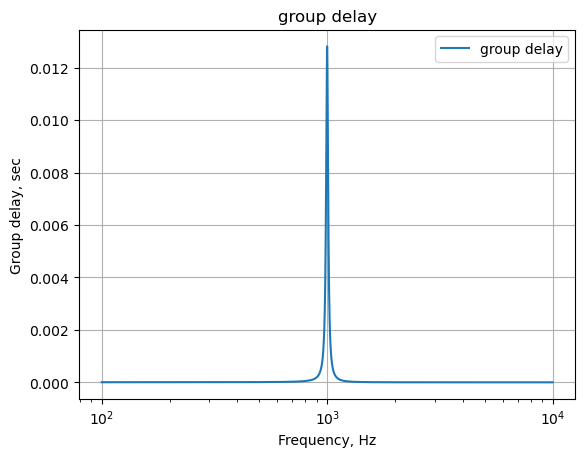

In [31]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()